In [1]:
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from thilib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display

In [2]:
import networkx as nx

In [3]:
%matplotlib inline

In [4]:
#flynumbers = 1548 #list(range(1389,1402))
flynumbers = list(range(1548,1549))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()

In [5]:
fly = flylist[0]

set(fly.experimental_block)

{'cl_blocks, g_x=-1, g_y=-4, b_x=-8, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=-4, b_x=-8, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=-4, b_x=0, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=-4, b_x=0, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=-4, b_x=8, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=-4, b_x=8, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=0, b_x=0, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=0, b_x=0, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=0, b_x=8, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=0, b_x=8, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=4, b_x=-8, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=4, b_x=-8, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=4, b_x=0, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=4, b_x=0, b_y=0, ch=1',
 'cl_blocks, g_x=-1, g_y=4, b_x=8, b_y=0, ch=0',
 'cl_blocks, g_x=-1, g_y=4, b_x=8, b_y=0, ch=1',
 'ol_blocks, g_x=-12, g_y=0, b_x=0, b_y=0, ch=0',
 'ol_blocks, g_x=-12, g_y=0, b_x=0, b_y=0, ch=1',
 'ol_b

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import flylib as flb
from flylib import util
import pandas as pd

In [7]:
fly = flb.NetFly(1540)
# fly = flb.NetFly(1548,rootpath='/home/annie/work/programming/fly_muscle_data/')
fly.open_signals()

In [8]:
flydf = pd.DataFrame()

flydf['t'] = fly.time
flydf['stimulus'] = np.array(fly.experimental_block)
flydf['amp_diff'] = np.array(fly.left_amp)-np.array(fly.right_amp)
#flydf['fly'] = 1540*np.ones(np.shape(fly.time))

In [9]:
for (key,value) in fly.ca_cam_left_model_fits.items():
    flydf[key+'_left'] = value
for (key,value) in fly.ca_cam_right_model_fits.items():
    flydf[key+'_right'] = value

# flydf['ca_pixel_left'] = fly.ca_cam_left #this is really big (obvs)
print(flydf.head())

          t             stimulus  amp_diff   pr_left  tpd_left   nm_left  \
0  0.000000  pretrial_stripe_fix  0.185503  2.703613  0.863035  3.489588   
1  0.020000  pretrial_stripe_fix  0.185503  2.667471  0.869201  3.426261   
2  0.040001  pretrial_stripe_fix  0.178633  2.608151  0.860391  3.430599   
3  0.060001  pretrial_stripe_fix  0.137410  2.673651  0.887700  3.633793   
4  0.080002  pretrial_stripe_fix  0.137410  2.592044  0.897104  3.566391   

   iii1_left  iii3_left   i2_left  hg2_left    ...      hg2_right  hg3_right  \
0   0.322758   4.536879  0.690521  4.848203    ...      11.044966        0.0   
1   0.319606   4.593572  0.670703  4.991345    ...      10.964133        0.0   
2   0.312846   4.550831  0.738452  4.877467    ...      11.225533        0.0   
3   0.340096   4.665894  0.675743  4.945966    ...      11.518416        0.0   
4   0.328254   4.673340  0.711561  5.062158    ...      11.163396        0.0   

   hg1_right  i1_right  bkg_right  b1_right  b2_right  b3_righ

In [10]:
print(np.unique(flydf['stimulus']))

['cl_blocks, g_x=-1, g_y=-4, b_x=-8, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=-4, b_x=-8, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=-4, b_x=0, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=-4, b_x=0, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=-4, b_x=8, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=-4, b_x=8, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=0, b_x=0, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=0, b_x=0, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=0, b_x=8, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=0, b_x=8, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=4, b_x=-8, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=4, b_x=-8, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=4, b_x=0, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=4, b_x=0, b_y=0, ch=True'
 'cl_blocks, g_x=-1, g_y=4, b_x=8, b_y=0, ch=False'
 'cl_blocks, g_x=-1, g_y=4, b_x=8, b_y=0, ch=True'
 'ol_blocks, g_x=-12, g_y=0, b_x=0, b_y=0, ch=0'
 'ol_blocks,

In [11]:
print(flydf.columns.values)

['t' 'stimulus' 'amp_diff' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']


In [12]:
#Here is an example of how to filter for rows of a certain column value
filtered_df = flydf.loc[flydf['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True']

print(filtered_df.head())

              t                                          stimulus  amp_diff  \
2926  58.521124  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.130539   
2927  58.541125  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.075575   
2928  58.561125  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.075575   
2929  58.581125  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.082446   
2930  58.601126  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.096187   

       pr_left  tpd_left   nm_left  iii1_left  iii3_left   i2_left  hg2_left  \
2926  2.428793  1.042408  3.566146   0.393616   4.872166  0.824834  6.866513   
2927  2.401159  0.979981  3.515217   0.385504   4.889001  0.774306  7.008298   
2928  2.461573  1.022985  3.677320   0.401066   5.049933  0.824622  7.096528   
2929  2.384257  1.060238  3.488397   0.384293   4.887157  0.775859  7.110548   
2930  2.376420  1.015099  3.530162   0.406915   4.942535  0.793341  6.976173   

        ...      hg2_right  hg3_right  hg1_r

In [13]:
#Or for a combination of column values
idx = (flydf['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        (flydf['amp_diff']>0.1)

double_filtered_df = flydf.loc[idx]

print(double_filtered_df.head())

              t                                          stimulus  amp_diff  \
2926  58.521124  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.130539   
2931  58.621126  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.123669   
2933  58.661127  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.103057   
2938  58.761129  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.109928   
2939  58.781129  cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True  0.123669   

       pr_left  tpd_left   nm_left  iii1_left  iii3_left   i2_left  hg2_left  \
2926  2.428793  1.042408  3.566146   0.393616   4.872166  0.824834  6.866513   
2931  2.408667  0.999164  3.566438   0.399568   4.966012  0.810405  6.502571   
2933  2.391620  0.952811  3.633092   0.385055   4.914978  0.812826  6.732488   
2938  2.508418  1.009264  3.498011   0.419274   4.983344  0.807610  6.597990   
2939  2.562687  1.024489  3.447573   0.422631   4.999176  0.791291  6.432494   

        ...      hg2_right  hg3_right  hg1_r

In [14]:
#Access calcium values for a specific muscle and specific stimulus
pretrial_stripe_fix_b2_right = flydf.loc[
    flydf['stimulus']=='pretrial_stripe_fix',['b2_right']]

print(np.shape(pretrial_stripe_fix_b2_right))

#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

(2075, 1)


In [45]:
#print(filtered_df[key+'_right'])

left_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys()+'_right')


print(sorted(fly.ca_cam_left_model_fits.keys()))


TypeError: can only concatenate list (not "str") to list

In [37]:
state_mtrx = np.vstack([filtered_df[key+'_right'] for key in sorted_keys])


ValueError: list.remove(x): x not in list

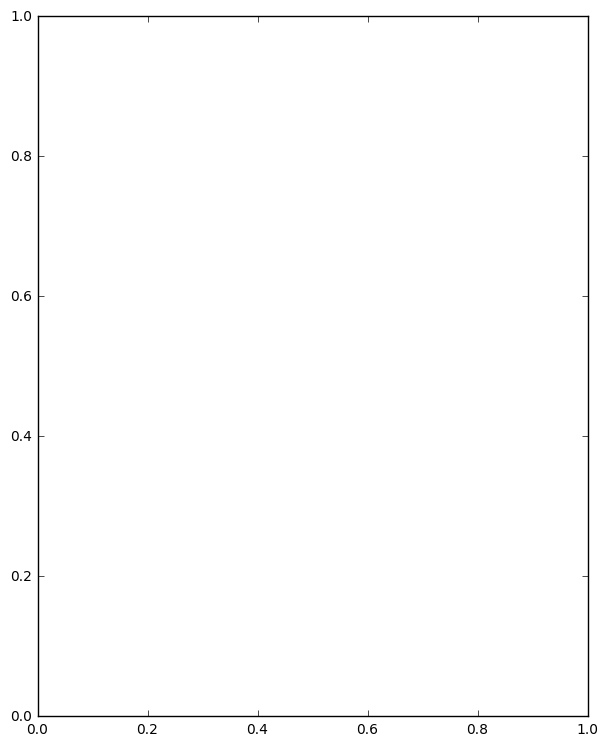

In [40]:

layout = fifi.FigureLayout('graph_layout.svg',make_mplfigures=True)


cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

[('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]



graphs = {}
for fly in flylist:
    #state_mtrx = np.vstack([fly.spikestates[key] for key in sorted_keys])
    state_mtrx = np.vstack([filtered_df[key+'_right'] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    cor_mtrx = np.dot(std_mtrx,std_mtrx.T)
    G = nx.Graph()
    for i,lbl1 in enumerate(sorted_keys):
        for j,lbl2 in enumerate(sorted_keys):
            G.add_edge(lbl1,lbl2,weight = cor_mtrx[i,j])
    graphs[fly.flynum] = G

edges = G.edges
c_ex = layout.pathspecs['excitatory'].mplkwargs()['edgecolor']
c_in = layout.pathspecs['inhibitory'].mplkwargs()['edgecolor']
colors = [{True:c_ex,False:c_in}[G[e[0]][e[1]]['weight']>0.] for e in edges]



h = float(layout.layout_uh)
pos_dict = {}
for n in G.nodes:
    n_s = '%s_%s'%(n[0][0].capitalize(),n[1])
    cx = float(layout.pathspecs[n_s]['cx'])
    cy = h-float(layout.pathspecs[n_s]['cy'])
    try:
        if 'transform' in layout.pathspecs[n_s].keys():
            t1 = fifi.svg_to_axes.parse_transform(layout.pathspecs[n_s]['transform'])
            p = np.dot(t1,np.array([cx,cy,1]))
            pos_dict[n] = (p[0],p[1])
        else:
            pos_dict[n]  = (cx,cy)
    except KeyError:
        print n

for flynum,G in graphs.items():
    edges= G.edges
    weights = [np.abs(G[e[0]][e[1]]['weight'])**2.6/100000000000. for e in edges]
    nx.draw(G,
            ax = layout.axes['network_graph_layout'],
            pos = pos_dict,
            font_color = 'r',
            with_labels= False,
            width = weights,
            edge_color = colors,
            node_color = 'k',
            alpha = 0.1)

    
    
layout.axes['network_graph_layout'].set_ybound(0,layout.axes['network_graph_layout'].h)
layout.axes['network_graph_layout'].set_xbound(0,layout.axes['network_graph_layout'].w)

layout.save('graph.svg')
plt.close('all')
display(SVG('graph.svg'))